# Datanın ve Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


titanic = pd.read_csv("titanic.csv")
data = titanic.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

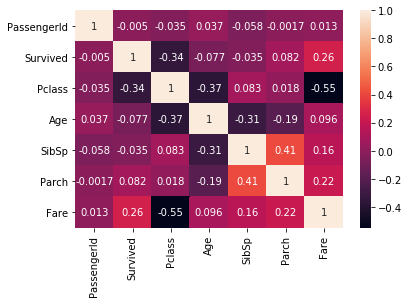

In [4]:
sns.heatmap(data.corr(),annot=True);

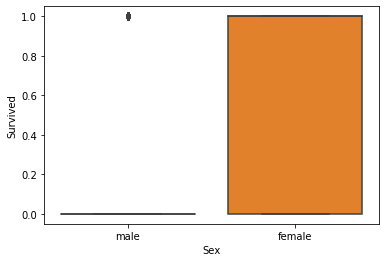

In [5]:
sns.boxplot(data=data,x="Sex",y="Survived");

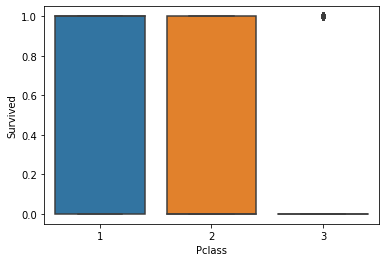

In [6]:
sns.boxplot(data=data,x="Pclass",y="Survived");

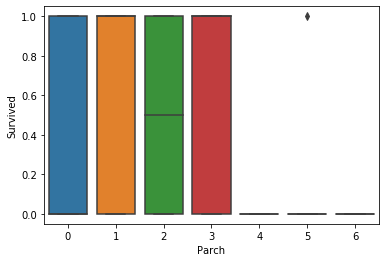

In [7]:
sns.boxplot(data=data,x="Parch",y="Survived")

In [8]:
data["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [9]:
data["Age"].isnull().sum()

177

In [10]:
data["Age"].mean()

29.69911764705882

In [11]:
data.fillna(data["Age"].mean(),inplace=True)

In [12]:
data["Age"].mean()

29.69911764705882

In [13]:
data["Age"].isna().sum()

0

In [14]:
data = data.drop(["Cabin","Ticket","Name"],axis = 1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
sex_ = {"male": 0 , "female": 1}
data["Sex"] = data["Sex"].map(sex_)

In [16]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [17]:
data["Embarked"].value_counts()

S                    644
C                    168
Q                     77
29.69911764705882      2
Name: Embarked, dtype: int64

In [18]:
data.fillna({'Embarked' : 'S'},inplace=True)

In [19]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
embarked_ = {'S' : 1, 'C':2, 'Q':3}
data["Embarked"] = data["Embarked"].map(embarked_)

In [21]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1.0
1,2,1,1,1,38.0,1,0,71.2833,2.0
2,3,1,3,1,26.0,0,0,7.9250,1.0
3,4,1,1,1,35.0,1,0,53.1000,1.0
4,5,0,3,0,35.0,0,0,8.0500,1.0


In [22]:
data.groupby("Survived")["Sex"].mean()

Survived
0    0.147541
1    0.681287
Name: Sex, dtype: float64

In [23]:
data.groupby("Survived")["Age"].mean()

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

In [24]:
data.groupby("Survived")["Embarked"].value_counts()

Survived  Embarked
0         1.0         427
          2.0          75
          3.0          47
1         1.0         217
          2.0          93
          3.0          30
Name: Embarked, dtype: int64

In [25]:
data.groupby("Survived")["Pclass"].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
X = data.drop(["PassengerId","Survived"],axis = 1)
y = data["Survived"]


In [27]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [28]:
X = X.fillna({"Embarked" : 1})

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
rf = RandomForestClassifier().fit(X_train,y_train)

0.7835820895522388

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train,y_train)

0.7985074626865671

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)

0.6865671641791045

In [33]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log_model = log.fit(X_train,y_train)

/Users/ahmetbugrabuga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8059701492537313

In [34]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree_model = dec_tree.fit(X_train,y_train)

0.7388059701492538

In [35]:
from sklearn.svm import SVC
svc = SVC()
svc_model = svc.fit(X_train,y_train)

0.6604477611940298

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(X_train,y_train)

0.8097014925373134

In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train,y_train)

0.7761194029850746

In [38]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat_model = cat.fit(X_train,y_train)

Learning rate set to 0.008417
0:	learn: 0.6869604	total: 58ms	remaining: 57.9s
1:	learn: 0.6810015	total: 59.7ms	remaining: 29.8s
2:	learn: 0.6755444	total: 61.6ms	remaining: 20.5s
3:	learn: 0.6700382	total: 63.3ms	remaining: 15.8s
4:	learn: 0.6652711	total: 64.9ms	remaining: 12.9s
5:	learn: 0.6597695	total: 66.6ms	remaining: 11s
6:	learn: 0.6542888	total: 68.1ms	remaining: 9.66s
7:	learn: 0.6494156	total: 69.7ms	remaining: 8.64s
8:	learn: 0.6447969	total: 71.4ms	remaining: 7.86s
9:	learn: 0.6398931	total: 73.2ms	remaining: 7.25s
10:	learn: 0.6368104	total: 76.7ms	remaining: 6.9s
11:	learn: 0.6318153	total: 78.4ms	remaining: 6.46s
12:	learn: 0.6267728	total: 80.2ms	remaining: 6.09s
13:	learn: 0.6218931	total: 81.6ms	remaining: 5.75s
14:	learn: 0.6188941	total: 82.6ms	remaining: 5.42s
15:	learn: 0.6143045	total: 84.4ms	remaining: 5.19s
16:	learn: 0.6105791	total: 85.6ms	remaining: 4.95s
17:	learn: 0.6059599	total: 87.4ms	remaining: 4.77s
18:	learn: 0.6036418	total: 88.5ms	remaining: 4.5

0.8208955223880597

In [41]:
from lightgbm import LGBMClassifier
light_model = LGBMClassifier().fit(X_train,y_train)

In [42]:
modeller = [
    rf,
    gnb_model,
    knn_model,
    log_model,
    dec_tree_model,
    svc_model,
    gbm_model,
    xgb_model,
    cat_model,
    light_model
]

In [45]:
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test,y_pred)
    print("-"*28)
    print("isimler" + ":" , isimler)
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
isimler: RandomForestClassifier
Accuracy: 78.3582%
----------------------------
isimler: GaussianNB
Accuracy: 79.8507%
----------------------------
isimler: KNeighborsClassifier
Accuracy: 68.6567%
----------------------------
isimler: LogisticRegression
Accuracy: 80.5970%
----------------------------
isimler: DecisionTreeClassifier
Accuracy: 73.8806%
----------------------------
isimler: SVC
Accuracy: 66.0448%
----------------------------
isimler: GradientBoostingClassifier
Accuracy: 80.9701%
----------------------------
isimler: XGBClassifier
Accuracy: 77.6119%
----------------------------
isimler: CatBoostClassifier
Accuracy: 82.0896%
----------------------------
isimler: LGBMClassifier
Accuracy: 80.9701%


In [46]:
# En iyi sonuç CatBoost, CatBoost için Model Tuning yapalım

In [47]:
from sklearn.model_selection import GridSearchCV
best_param = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01,0.3,0.5,0.1],
    'depth': [3,4,5,6,7,8]
}


cat = CatBoostClassifier()
cat_cv_model = GridSearchCV(cat,best_param,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 11.8min finished


0:	learn: 0.6858055	total: 1.41ms	remaining: 281ms
1:	learn: 0.6788848	total: 2.64ms	remaining: 261ms
2:	learn: 0.6750524	total: 3.6ms	remaining: 236ms
3:	learn: 0.6695460	total: 4.5ms	remaining: 221ms
4:	learn: 0.6660975	total: 5.29ms	remaining: 206ms
5:	learn: 0.6605072	total: 6.44ms	remaining: 208ms
6:	learn: 0.6549409	total: 7.7ms	remaining: 212ms
7:	learn: 0.6491391	total: 8.9ms	remaining: 214ms
8:	learn: 0.6451761	total: 10.1ms	remaining: 215ms
9:	learn: 0.6393028	total: 11.6ms	remaining: 220ms
10:	learn: 0.6336610	total: 12.7ms	remaining: 218ms
11:	learn: 0.6289841	total: 13.7ms	remaining: 215ms
12:	learn: 0.6237882	total: 14.8ms	remaining: 213ms
13:	learn: 0.6191238	total: 16.1ms	remaining: 213ms
14:	learn: 0.6136621	total: 17.2ms	remaining: 212ms
15:	learn: 0.6083774	total: 18.4ms	remaining: 211ms
16:	learn: 0.6040616	total: 19.5ms	remaining: 210ms
17:	learn: 0.5987760	total: 20.6ms	remaining: 208ms
18:	learn: 0.5936829	total: 21.7ms	remaining: 207ms
19:	learn: 0.5898166	total

In [48]:
cat_cv_model.best_params_

{'depth': 5, 'iterations': 200, 'learning_rate': 0.01}

In [54]:
cat_tuned = CatBoostClassifier(depth=5,iterations=200,learning_rate=0.01)
cat_tuned_model = cat_tuned.fit(X_train,y_train)
y_tuned_pred = cat_tuned_model.predict(X_test)
accuracy_score(y_tuned_pred,y_test)

0:	learn: 0.6858055	total: 2.38ms	remaining: 474ms
1:	learn: 0.6788848	total: 4.98ms	remaining: 493ms
2:	learn: 0.6750524	total: 6ms	remaining: 394ms
3:	learn: 0.6695460	total: 7.08ms	remaining: 347ms
4:	learn: 0.6660975	total: 7.91ms	remaining: 308ms
5:	learn: 0.6605072	total: 9.29ms	remaining: 300ms
6:	learn: 0.6549409	total: 10.7ms	remaining: 295ms
7:	learn: 0.6491391	total: 12.1ms	remaining: 289ms
8:	learn: 0.6451761	total: 13.5ms	remaining: 286ms
9:	learn: 0.6393028	total: 14.9ms	remaining: 282ms
10:	learn: 0.6336610	total: 16.3ms	remaining: 280ms
11:	learn: 0.6289841	total: 17.5ms	remaining: 273ms
12:	learn: 0.6237882	total: 18.9ms	remaining: 271ms
13:	learn: 0.6191238	total: 20.3ms	remaining: 270ms
14:	learn: 0.6136621	total: 21.8ms	remaining: 269ms
15:	learn: 0.6083774	total: 23.2ms	remaining: 267ms
16:	learn: 0.6040616	total: 24.6ms	remaining: 265ms
17:	learn: 0.5987760	total: 26ms	remaining: 263ms
18:	learn: 0.5936829	total: 27.3ms	remaining: 260ms
19:	learn: 0.5898166	total:

0.8171641791044776

In [57]:
feat_best = pd.Series(cat_tuned_model.feature_importances_,index=X_train.columns)

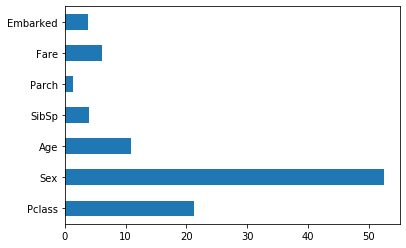

In [58]:
# En iyi 3 parametre Sex,Age ve Pclass sadece bu sütunlarla yeniden model kurulabilir.
feat_best.plot(kind="barh");

In [59]:
data.to_csv("final_titanic.csv")